In [46]:
import pandas as pd
from pathlib import Path

SCRIPT_DIR = str(Path().parent.resolve())
DATA_PATH = str(Path(SCRIPT_DIR, "data", "log.txt"))
YEAR = "2022"

In [47]:
import numpy as np


def show_text_file_contents(data_path):
    with open(data_path, "r", encoding='UTF-8') as f:
        data = f.read()
        print(data)


def count_num_rows_and_cols(data_path):
    row_count = 0
    col_count = 0
    with open(data_path, "r") as f:
        for line in f:
            row_count += 1
            n_col = len(line.split(" "))
            if col_count < n_col:
                col_count = len(line.split(" "))
            print()
    return row_count, col_count


In [48]:
show_text_file_contents(DATA_PATH)

アプリ「熱はかった？」から送信
---
8月3日(水) 19:29 37.2°C 頭が痛い
8月3日(水) 19:22 37.3°C 頭が痛い
8月3日(水) 19:11 37.3°C 頭が痛い
8月3日(水) 18:40 37.5°C 頭が痛い
8月3日(水) 18:25 37.7°C 頭が痛い
8月3日(水) 18:15 37.6°C
8月3日(水) 18:07 37.6°C 頭が痛い
8月3日(水) 18:01 37.6°C 頭が痛い,寒気がする
8月3日(水) 17:52 37.8°C 頭が痛い,寒気がする
8月3日(水) 17:42 37.3°C 頭が痛い
8月3日(水) 17:33 37.7°C
8月3日(水) 17:23 37.7°C
8月3日(水) 17:17 37.7°C
8月3日(水) 17:06 37.6°C
8月3日(水) 17:00 37.5°C


iPhoneから送信


In [49]:
num_rows, num_cols = count_num_rows_and_cols(DATA_PATH)
target_indices = [0, 1, num_rows - 2 , num_rows - 1, num_rows]
col_names =  ["day", "time", "celsius degrees", "attributes"]
dataset_pd = pd.read_csv(DATA_PATH, encoding="utf_8", names=col_names, skiprows=target_indices, sep='\s+')

In [50]:
dataset_pd

,day,time,celsius degrees,attributes
0,8月3日(水),19:29,37.2°C,頭が痛い
1,8月3日(水),19:22,37.3°C,頭が痛い
2,8月3日(水),19:11,37.3°C,頭が痛い
3,8月3日(水),18:40,37.5°C,頭が痛い
4,8月3日(水),18:25,37.7°C,頭が痛い
5,8月3日(水),18:15,37.6°C,NaN
6,8月3日(水),18:07,37.6°C,頭が痛い
7,8月3日(水),18:01,37.6°C,"頭が痛い,寒気がする"
8,8月3日(水),17:52,37.8°C,"頭が痛い,寒気がする"
9,8月3日(水),17:42,37.3°C,頭が痛い


In [51]:
import re
import datetime

def extract_timestamp(day_str, time_str, year) -> datetime.datetime:
    day_str_with_year = f"{year}年" + re.sub("\(.*\)", "", day_str) + time_str
    return datetime.datetime.strptime(day_str_with_year, '%Y年%m月%d日%H:%M')

def as_float_cercius_degrees_value(degrees_str):
    return float(degrees_str.replace("°C", ""))

In [52]:
num_data = dataset_pd.shape[0]
timestamps = [extract_timestamp(day_str, time_str, YEAR) for day_str, time_str in zip(dataset_pd["day"], dataset_pd["time"])][::-1]
degrees = [as_float_cercius_degrees_value(degrees_str) for degrees_str in dataset_pd["celsius degrees"]][::-1]

In [53]:
df_to_draw = pd.DataFrame(list(zip(timestamps, degrees)), columns=["Timestamp", "Temperature"])

In [54]:
df_to_draw

,Timestamp,Temperature
0,2022-08-03 17:00:00,37.5
1,2022-08-03 17:06:00,37.6
2,2022-08-03 17:17:00,37.7
3,2022-08-03 17:23:00,37.7
4,2022-08-03 17:33:00,37.7
5,2022-08-03 17:42:00,37.3
6,2022-08-03 17:52:00,37.8
7,2022-08-03 18:01:00,37.6
8,2022-08-03 18:07:00,37.6
9,2022-08-03 18:15:00,37.6


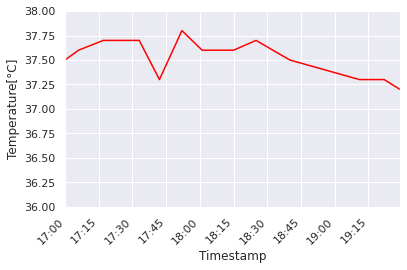

In [55]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
sns.set(style="darkgrid")

fig, ax = plt.subplots()
sns.lineplot(x="Timestamp", y="Temperature", data=df_to_draw, color="red")
ax.set_ylim([36.0, 38.0])
ax.set_xlim([timestamps[0], timestamps[-1]])
ax.set_xlabel("Timestamp")
ax.set_ylabel("Temperature[°C]")
fig.autofmt_xdate(rotation=45)
date_form = DateFormatter("%H:%M")
ax.xaxis.set_major_formatter(date_form)
plt.show()